# Imports

In [2]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from scipy.ndimage import binary_dilation
import matplotlib.patches as mpatches

In [3]:
# plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.2)

# Data & Setup

In [4]:
data_dir = "../data/raw/Task07_Pancreas/imagesTr"
label_dir = "../data/raw/Task07_Pancreas/labelsTr"

In [5]:
# first sample
sample_filename = "pancreas_001.nii.gz"
img = nib.load(os.path.join(data_dir, sample_filename)) # lazy loading
label = nib.load(os.path.join(label_dir, sample_filename)) # lazy loading
# to numpy 
image_data = img.get_fdata() 
label_data = label.get_fdata()
# metadata
header = img.header
spacing = header.get_zooms()

# Segmentation by Intensity values

idea:
- segmentation by intensity range (see data analysis)

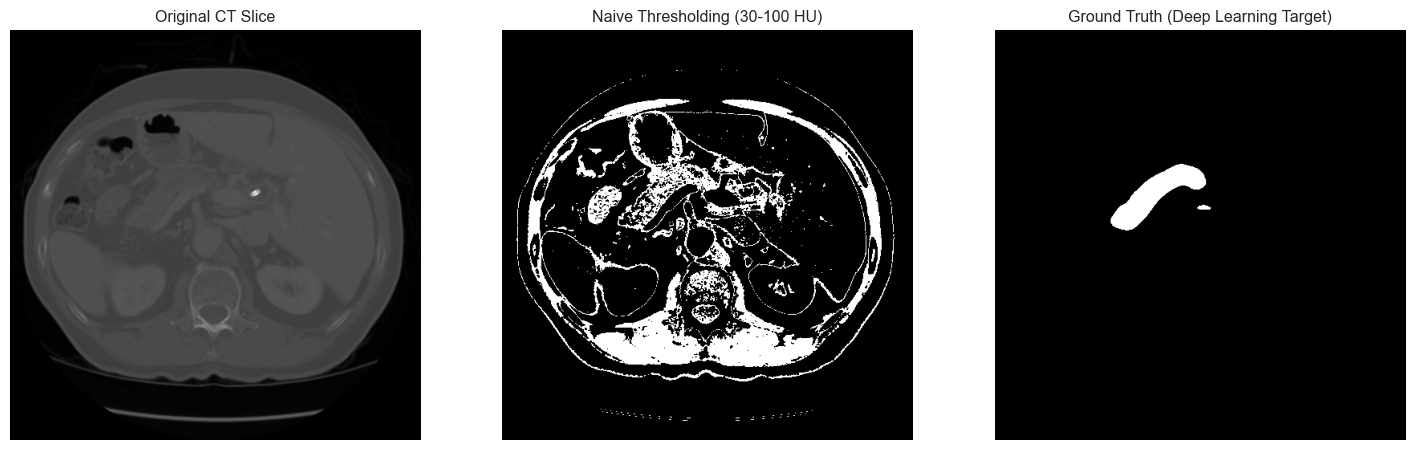

In [6]:
def plot_threshold_baseline(image_data, label_data, slice_idx):
    lower_bound = 30
    upper_bound = 100
    
    naive_mask = (image_data[:, :, slice_idx] >= lower_bound) & \
                 (image_data[:, :, slice_idx] <= upper_bound)
    
    ground_truth = label_data[:, :, slice_idx] > 0
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    
    ax[0].imshow(image_data[:, :, slice_idx].T, cmap='gray', origin='lower')
    ax[0].set_title("Original CT Slice")
    
    ax[1].imshow(naive_mask.T, cmap='gray', origin='lower')
    ax[1].set_title(f"Naive Thresholding ({lower_bound}-{upper_bound} HU)")
    
    ax[2].imshow(ground_truth.T, cmap='gray', origin='lower')
    ax[2].set_title("Ground Truth (Deep Learning Target)")
    
    for a in ax: a.axis('off')
    plt.show()

plot_threshold_baseline(image_data, label_data, slice_idx=image_data.shape[2]//2)

interpretation:
- pancreas in naive thresholding
- A LOT of other "obejcts"/ regions with same HU band 